# Figure 5 - Background-averaged fitness effects

In [1]:
# load external dependencies
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline

import math

import json, matplotlib
s = json.load( open("matplotlibrc.json") )
matplotlib.rcParams.update(s)

from itertools import *

import random
import pandas as pd # (*) Pandas for data manipulation
import numpy as np
import scipy as sp
import os,glob

# load internal dependencies
import colors,plot,stats,utils

%load_ext autoreload
%autoreload 2

# absolute file path for data directory
from paths import *

/Users/ivg/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/Users/ivg/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


## Spores

In this experiment, we choose a set of ancestral and evolved clones. All of these are diploid cells which undergo sporulation. We can import the plate layout and the growth parameters. These two dataframes can be merged by the plate index, and row and column indices within the plates.

In [2]:
# load data
spores_abs_df = utils.load_data(dir_data+'pheno/pheno_spores_abs.pickle')
spores_norm_df = utils.load_data(dir_data+'pheno/pheno_spores_norm.pickle')

# filter out blank positions, contamination and constructs
spores_norm_df = spores_norm_df[(spores_norm_df['contamination']=='no')&\
                                ~(spores_norm_df['strain'].isin(['control','']))&\
                                ~(spores_norm_df['genotype_long'].isin([u'fpr1Δ',u'tor1Δ']))]

   
# remove NaNs
# spores_norm_df = spores_norm_df[np.isfinite(spores_norm_df['growth_rate'])]

spores_norm_df.head()  # show dataframe header to stdout

,Layout,Plate,Row,Column,env_evo,env_test,ID_YJH,strain,ID,background,...,tetrad,spore,mating,auxotrophy,genotype_short,genotype_long,aminoacid,contamination,doubling_time,growth_rate
0,0,0,0,0,HU,HU,1903,spore,WAxNA_F12_2_HU_1_T34_C1,evolved,...,A,2,MATα,lys2-,+,RNR4,,no,0.197277,0.872196
1,0,0,0,1,HU,HU,1903,spore,WAxNA_F12_2_HU_1_T34_C1,evolved,...,A,2,MATα,lys2-,+,RNR4,,no,0.482655,0.715659
2,0,0,0,2,HU,HU,1903,spore,WAxNA_F12_2_HU_1_T34_C1,evolved,...,A,2,MATα,lys2-,+,RNR4,,no,0.517250,0.698703
3,0,0,0,3,HU,HU,1903,spore,WAxNA_F12_2_HU_1_T34_C1,evolved,...,A,2,MATα,lys2-,+,RNR4,,no,0.554730,0.680785
4,0,0,0,4,HU,HU,1909*,spore,WAxNA_F12_2_HU_1_T34_C1,evolved,...,B,4,MATα,lys2-,-,RNR4*,Arg34Ile,no,0.276690,0.825483


In [ ]:
#spore_abs_df.to_csv(dir_data+'spores/20150402_spores_abs_pheno_filtered_with_labels.csv', encoding='utf-8', index=False, sep='\t')
#spore_norm_df.to_csv(dir_data+'spores/20150402_spores_norm_pheno_filtered_with_labels.csv', encoding='utf-8', index=False, sep='\t')

## Hybrids

In [3]:
# load data
hybrids_abs_df = utils.load_data(dir_data+'pheno/pheno_hybrids_abs.pickle')
hybrids_norm_df = utils.load_data(dir_data+'pheno/pheno_hybrids_norm.pickle')

# filter out contamination
# hybrids_norm_df = hybrids_norm_df[hybrids_norm_df.contamination.isin([('no','no')])]
# hybrids_norm_df['Generation Time'] = hybrids_norm_df['Generation Time']\
# .where(hybrids_norm_df.contamination.isin([('yes','no'),('no','yes'),('yes','yes')]), np.nan)

# filter out blank positions, contamination and constructs
hybrids_norm_df = hybrids_norm_df[(hybrids_norm_df['contamination']==('no','no'))&\
                                  ~(hybrids_norm_df['strain'].isin([('control','control'),('','')]))&\
                                  ~(hybrids_norm_df['genotype_long'].isin([u'fpr1Δ',u'tor1Δ']))]

# remove NaNs
# hybrids_norm_df = hybrids_norm_df[np.isfinite(hybrids_norm_df['growth_rate'])]

hybrids_norm_df.head()  # show dataframe header to stdout

,Layout,Plate,Row,Column,env_evo,env_test,MATa,strain_MATa,ID_MATa,background_MATa,...,background,population,gene,genotype_short,genotype_long,auxotrophy,tetrad,spore,strain,contamination
31488,1,0,8,20,RM,RM,lys_218_R1 a ura-,spore,WAxNA,ancestral,...,"(ancestral, evolved)","(WAxNA, WAxNA)","(, TOR1)","(+, -)","(, TOR1*)","(lys2-, ura3-)","(A, A)","(1, 1)","(spore, spore)","(no, no)"
31489,1,0,8,21,RM,RM,lys_218_R1 a ura-,spore,WAxNA,ancestral,...,"(ancestral, evolved)","(WAxNA, WAxNA)","(, TOR1)","(+, -)","(, TOR1*)","(lys2-, ura3-)","(A, A)","(1, 1)","(spore, spore)","(no, no)"
31490,1,0,9,20,RM,RM,lys_218_R1 a ura-,spore,WAxNA,ancestral,...,"(ancestral, evolved)","(WAxNA, WAxNA)","(, TOR1)","(+, -)","(, TOR1*)","(lys2-, ura3-)","(A, A)","(1, 1)","(spore, spore)","(no, no)"
31491,1,1,8,20,RM,YNB,lys_218_R1 a ura-,spore,WAxNA,ancestral,...,"(ancestral, evolved)","(WAxNA, WAxNA)","(, TOR1)","(+, -)","(, TOR1*)","(lys2-, ura3-)","(A, A)","(1, 1)","(spore, spore)","(no, no)"
31492,1,1,8,21,RM,YNB,lys_218_R1 a ura-,spore,WAxNA,ancestral,...,"(ancestral, evolved)","(WAxNA, WAxNA)","(, TOR1)","(+, -)","(, TOR1*)","(lys2-, ura3-)","(A, A)","(1, 1)","(spore, spore)","(no, no)"


In [4]:
#hybrid_abs_df.to_csv(dir_data+'hybrids/20150402_hybrids_abs_pheno_filtered_with_labels.txt', index=False, sep='\t')
#hybrid_norm_df.to_csv(dir_data+'hybrids/20150402_hybrids_norm_pheno_filtered_with_labels.txt', index=False, sep='\t')

## Clones

In [5]:
# load data
clone_norm_df = utils.load_data(dir_data+'pheno/pheno_populations_norm.pickle')

# filter out strains used for spatial control
clone_norm_df = clone_norm_df[(clone_norm_df.background == 'ancestral')|\
                              (clone_norm_df.background == 'evolved')]

clone_norm_df['genotype_short'] = map(lambda x: tuple(x.strip("/").split("/")),clone_norm_df['genotype_short'])
clone_norm_df['genotype_long'] = map(lambda x: tuple(x.strip("/").split("/")),clone_norm_df['genotype_long'])

clone_norm_df['population'] = zip(clone_norm_df.population, clone_norm_df.population)
clone_norm_df['background'] = zip(clone_norm_df.background, clone_norm_df.background)
clone_norm_df['gene'] = zip(clone_norm_df.gene, clone_norm_df.gene)
# clone_norm_df['genotype'] = zip(clone_norm_df.genotype, clone_norm_df.genotype)

# remove NaNs
# clone_norm_df = clone_norm_df[np.isfinite(clone_norm_df['growth_rate'])]

clone_norm_df.head()

,env_evo,env_test,run,Index,Plate,Row,Column,ID,ID_plate,background,...,assignment,isolate,gene,genotype_short,genotype_long,aminoacid,mating,auxotrophy,doubling_time,growth_rate
0,RM,RM,1,0,0,0,0,P1_A1,1,"(ancestral, ancestral)",...,,1,"(, )","(+, +)","(,)",,MATa/α,,-0.037316,1.026203
1,RM,RM,1,1,0,0,1,P2_A1,2,"(ancestral, ancestral)",...,,1,"(, )","(+, +)","(,)",,MATa/α,,0.101343,0.932165
2,RM,RM,1,2,0,0,2,P6_A1,6,"(evolved, evolved)",...,,1,"(, )","(+, +)","(,)",,MATa/α,,0.039118,0.973249
3,RM,RM,1,3,0,0,3,P7_A1,7,"(evolved, evolved)",...,,1,"(, )","(+, +)","(,)",,MATa/α,,-0.802399,1.743999
4,RM,RM,1,4,0,0,4,P1_A2,1,"(ancestral, ancestral)",...,,2,"(, )","(+, +)","(,)",,MATa/α,,0.235418,0.849439


### Summary of technical replicates

In [6]:
# import colors

# pt = pd.pivot_table(spore_norm_df,
#                index=["env_evo","env_test"],
#                values=["Generation Time"],
#                columns=['gene','genotype','tetrad','spore'],
#                aggfunc=[np.mean,np.std])

# groups = spore_norm_df.groupby(['env_evo','env_test',
#                                 'gene','genotype','tetrad','spore'])

# norm_filtered_avg_df = groups['Generation Time'].agg([np.mean, np.std, 'count'])


# #pg.describe(include=['Lag','Yield'])
# # norm_filtered_avg_df.groupby(['env_evo'])

In [7]:
# population attributes
sp_bg_dict = {
'position':
{'HU': 
 {'parents': 0, 'ancestral': 1, 'evolved': 2},
'RM':
 {'parents': 0, 'ancestral': 1, 'evolved': 2}
 }
}

# background attributes
sp_cl_dict = {
'position':
{'HU': 
 {'WA': 0, 'NA': 1, 'WAxNA': 2},
'RM':
 {'WA': 0, 'NA': 1, 'WAxNA': 2},
 },
'color':
{'HU':
 {'WA': colors.fte_colors[0], 'NA': colors.fte_colors[1], 'WAxNA': colors.fte_colors[2]},
'RM':
 {'WA': colors.fte_colors[0], 'NA': colors.fte_colors[1], 'WAxNA': colors.fte_colors[2]},
}
}

# gene attributes
sp_gn_dict = {
'position':
{'HU': 
 {'RNR2': 0, 'RNR4': 1},
'RM':
 {'no driver': 0, 'FPR1': 1, 'TOR1': 2},
 }
}

# genotype attributes
sp_gt_long_dict = {
'position':
 {'HU': 
  {'': 0, 'RNR2': 1, 'RNR2*': 2, 'RNR4': 3, 'RNR4*': 4},
  'RM': 
  {'': 0, 'no driver': 1, 'FPR1*': 2, 'TOR1': 3, 'TOR1*': 4}
  },
'color':
  {'HU': 
  {'': colors.fte_colors[0], 'RNR2': colors.fte_colors[1], 'RNR2*': colors.fte_colors[2], 'RNR4': colors.fte_colors[1], 'RNR4*': colors.fte_colors[2]},
  'RM': 
  {'': colors.fte_colors[0], 'no driver': colors.fte_colors[1], 'FPR1*': colors.fte_colors[2], 'TOR1': colors.fte_colors[1], 'TOR1*': colors.fte_colors[2]}
  }
}

# genotype attributes
sp_gt_short_dict = {
'position':
 {'HU': 
  {'+': 0, '-': 1},
  'RM': 
  {'+': 0, '-': 1}
  },
'color':
  {'HU': 
  {'+': colors.fte_colors[0], '-': colors.fte_colors[1]},
  'RM': 
  {'+': colors.fte_colors[0], '-': colors.fte_colors[1]}
  }
}

# collection attributes
hy_bg_dict = {
'position':
{'HU': 
 {('parents','parents'): 0, ('ancestral','ancestral'): 1, 
  ('ancestral','evolved'): 2, ('evolved','evolved'): 3},
'RM':
 {('parents','parents'): 0, ('ancestral','ancestral'): 1, 
  ('ancestral','evolved'): 2, ('evolved','evolved'): 3}
 }
}

# background attributes
hy_cl_dict = {
'position':
{'HU': 
 {('WA','WA'): 0, ('NA','NA'): 1, ('WAxNA','WAxNA'): 2},
'RM':
 {('WA','WA'): 0, ('NA','NA'): 1, ('WAxNA','WAxNA'): 2},
 },
'color':
{'HU':
 {('WA','WA'): colors.fte_colors[0], ('NA','NA'): colors.fte_colors[1], ('WAxNA','WAxNA'): colors.fte_colors[2]},
'RM':
 {('WA','WA'): colors.fte_colors[0], ('NA','NA'): colors.fte_colors[1], ('WAxNA','WAxNA'): colors.fte_colors[2]},
}
}

# gene attributes
hy_gn_dict = {
'position':
{'HU': 
 {('','RNR2'): 0, ('','RNR4'): 1,
  ('RNR2','RNR2'): 0, ('RNR4','RNR4'): 1, ('RNR2','RNR4'): 2},
'RM':
 {('','no driver'): 0, ('','FPR1'): 1, ('','TOR1'): 2,
  ('no driver','no driver'): 0, ('no driver','TOR1'): 1, ('FPR1','FPR1'): 2, ('TOR1','TOR1'): 3, ('FPR1','TOR1'): 4},
 }
}

# genotype attributes
hy_gt_long_dict = {
'position':
{'HU': 
 {('',''): 0,
  ('','RNR2'): 1, ('','RNR2*'): 2, ('','RNR4'): 3, ('','RNR4*'): 4,
  ('RNR2','RNR2'): 5, ('RNR2','RNR2*'): 6, ('RNR2*','RNR2*'): 7, 
  ('RNR4','RNR4'): 8, ('RNR4','RNR4*'): 9, ('RNR4*','RNR4*'): 10, 
  ('RNR2','RNR4'): 11, ('RNR2*','RNR4'): 12, ('RNR2','RNR4*'): 13, ('RNR2*','RNR4*'): 14},
'RM':
 {('',''): 0,
  ('','FPR1'): 1, ('','FPR1*'): 2, ('','TOR1'): 3, ('','TOR1*'): 4,
  ('no driver','no driver'): 5, ('FPR1','FPR1'): 6, ('FPR1*','FPR1*'): 7,
  ('TOR1','TOR1'): 8, ('TOR1','TOR1*'): 9, ('TOR1*','TOR1*'): 10,
  ('FPR1','TOR1'): 11, ('FPR1*','TOR1'): 12, ('FPR1','TOR1*'): 13, ('FPR1*','TOR1*'): 14},
 },
'color':
{'HU':
 {('',''): colors.fte_colors[0],
  ('','RNR2'): colors.fte_colors[1], ('','RNR2*'): colors.fte_colors[2], ('','RNR4'): colors.fte_colors[1], ('','RNR4*'): colors.fte_colors[2],
  ('RNR2','RNR2'): colors.fte_colors[1], ('RNR2','RNR2*'): colors.fte_colors[2], ('RNR2*','RNR2*'): colors.fte_colors[3],
  ('RNR4','RNR4'): colors.fte_colors[1], ('RNR4','RNR4*'): colors.fte_colors[2], ('RNR4*','RNR4*'): colors.fte_colors[3],
  ('RNR2','RNR4'): colors.fte_colors[1], ('RNR2*','RNR4'): colors.fte_colors[2], ('RNR2','RNR4*'): colors.fte_colors[2], ('RNR2*','RNR4*'): colors.fte_colors[3]},
'RM':
 {('',''): colors.fte_colors[0],
  ('','FPR1'): colors.fte_colors[1], ('','FPR1*'): colors.fte_colors[2], ('','TOR1'): colors.fte_colors[1], ('','TOR1*'): colors.fte_colors[2],
  ('no driver','no driver'): colors.fte_colors[1], ('FPR1','FPR1'): colors.fte_colors[1], ('FPR1*','FPR1*'): colors.fte_colors[3],
  ('TOR1','TOR1'): colors.fte_colors[1], ('TOR1','TOR1*'): colors.fte_colors[2], ('TOR1*','TOR1*'): colors.fte_colors[3],
  ('FPR1','TOR1'): colors.fte_colors[1], ('FPR1*','TOR1'): colors.fte_colors[2], ('FPR1','TOR1*'): colors.fte_colors[2], ('FPR1*','TOR1*'): colors.fte_colors[3]},
}
}

# genotype attributes
hy_gt_short_dict = {
'position':
{'HU': 
 {('+','+'): 0, ('+','-'): 1, ('-','-'): 2},
'RM':
 {('+','+'): 0, ('+','-'): 1, ('-','-'): 2},
 },
'color':
{'HU':
 {('+','+'): colors.fte_colors[0], ('+','-'): colors.fte_colors[1], ('-','-'): colors.fte_colors[2]},
'RM':
 {('+','+'): colors.fte_colors[0], ('+','-'): colors.fte_colors[1], ('-','-'): colors.fte_colors[2]},
}
}

# factor attributes
factor_dict = {
    'color': {
        'background': colors.fte_colors[0], 
        'de_novo_gene': colors.fte_colors[1], 
        'de_novo_genotype': colors.fte_colors[2],
        'auxotrophy': colors.fte_colors[3],
        'tetrad': colors.fte_colors[4],
        'spore': colors.fte_colors[4]
#         'background': "#348ABD", 
#         'de_novo_gene': "#A60628", 
#         'de_novo_genotype': "#7A68A6",
#         'auxotrophy': "#467821",
#         'tetrad': "#CF4457",
#         'spore': "#188487"
        },
    'hatch': {
        'spores': " ", 
        'hybrids': "/"
        },
    'position': {
        'background': 0, 
        'de_novo_gene': 1, 
        'de_novo_genotype': 2,
        'auxotrophy': 3,
        'tetrad': 4,
        'spore': 5     
    }
}

## Spores and hybrids

In this experiment, we cross the mutant allele to a sample of wild-derived lines with standing variation, and we evaluate phenotypes of F1 genotypes. Phenotypic variation can then be attributed to allelic complementation (that is, dominance effects) or to non-allelic complementation (that is, epistasis).

In [8]:
dict_background = {'parents':0, 'ancestral':1, 'evolved':2}
dict_population = {'WA':0, 'NA':1, 'WAxNA':2}
dict_gene = {'RNR2':0, 'RNR4':1, 'no driver':0, 'FPR1':1, 'TOR1':2}
dict_genotype = {'+':0,'-':1}

labels = {
    'Generation Time':'doubling_time',
    'gene':'de_novo_gene',
    'genotype_short':'de_novo_genotype'
}

# environment attributes
environments = {u'HU': u'Hydroxyurea (YNB+HU 10 mg/ml)', 
                u'RM': u'Rapamycin (YNB+RM 0.025 μg/ml)', 
                u'YNB': u'Control (YNB)'}

### Ensemble by background and genotype

/Users/ivg/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/pandas/core/indexing.py:266: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/ivg/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/pandas/core/indexing.py:426: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/Users/ivg/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

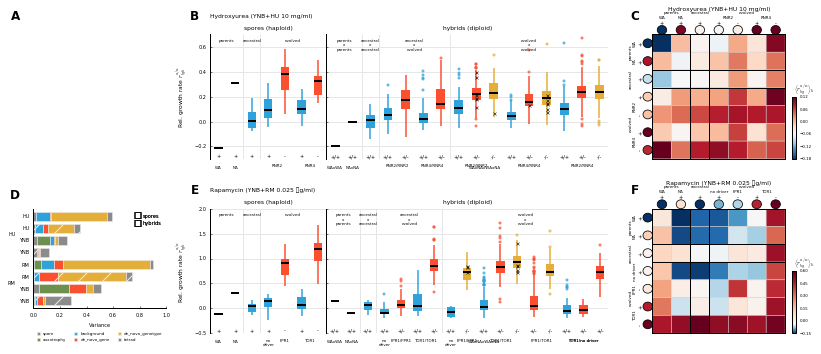

In [9]:
# create groups by environment
groups_sp = spores_norm_df.groupby(['env_evo','env_test'])
groups_hy = hybrids_norm_df.groupby(['env_evo','env_test'])
groups_cl = clone_norm_df.groupby(['env_evo','env_test'])

param='growth_rate'

fig = plt.figure(figsize=(12, 5), dpi=300)

import matplotlib.gridspec as gridspec
grid = gridspec.GridSpec(2, 3, width_ratios=[1,3,1], hspace=0.4, wspace=0.2)

gs = {}
gs['schematic'] = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=grid[0,0])
gs['variance'] = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=grid[1,0])
gs[('HU','heatmap')] = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=grid[0,2])
gs[('HU','barplot')] = gridspec.GridSpecFromSubplotSpec(1, 24, subplot_spec=grid[0,1], wspace=0)
gs[('RM','heatmap')] = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=grid[1,2])
gs[('RM','barplot')] = gridspec.GridSpecFromSubplotSpec(1, 24, subplot_spec=grid[1,1], wspace=0)


### analysis of variance ###
ax = plt.subplot(gs['schematic'][:])

ax.axis('off')
ax.patch.set_visible(False)
    
ax.text(-0.1, 1.2, chr(ord('A')), transform=ax.transAxes,
        fontsize=12, fontweight='bold', va='top', ha='right')

### analysis of variance ###
ax0 = plt.subplot(gs['variance'][:])
    
ax0.text(-0.1, 1.2, chr(ord('D')), transform=ax0.transAxes,
         fontsize=12, fontweight='bold', va='top', ha='right')

S = spores_norm_df[spores_norm_df.background.isin(['ancestral','evolved'])]
S = S.rename(columns=labels, copy=True)
S = S[np.isfinite(S['growth_rate'])]

H = hybrids_norm_df[hybrids_norm_df.background.isin([('ancestral','ancestral'),('ancestral','evolved'),('evolved','evolved')])]
H = H.rename(columns=labels, copy=True)
H = H[np.isfinite(H['growth_rate'])]

formula = 'growth_rate ~ background + de_novo_gene + de_novo_genotype + auxotrophy + tetrad + C(spore)'

tsdf = S.groupby(['env_evo','env_test']).apply(stats.variance_vectors, formula)
thdf = H.groupby(['env_evo','env_test']).apply(stats.variance_vectors, formula)
    
df = pd.concat([tsdf, thdf], keys=['spores','hybrids'], names=['type'])
    
# fix columns
df = df.rename(columns={'C(spore)':'spore'})

df = df.swaplevel('type', 'env_evo')
df = df.sortlevel(['env_evo','env_test'], ascending=False, axis=0)
    
utils.simple_axes(ax0)
    
df.plot(ax=ax0, kind='barh', stacked=True, 
        color=[factor_dict['color'][x] for x in df.columns],
        align='center', legend=False, width=0.75)

bars = ax0.patches
hatches = ''.join([factor_dict['hatch'][x] for x in df.index.get_level_values('type')]*len(df)*2)

for bar, hatch in zip(bars, hatches):
    bar.set_hatch(hatch)

ax0.set_xlabel('Variance', fontsize=5, y=0.9)
ax0.set_ylabel('')

ystart, yend, ylabels = plot.set_custom_labels(df.index, 0)
ax0.set_yticks(ylabels.values(), minor=True)
ax0.set_yticklabels(ylabels.keys(), minor=True)

ylabels = df.index.get_level_values('env_test')
ax0.set_yticks(np.arange(len(ylabels)), minor=False)
ax0.set_yticklabels(ylabels, minor=False)

ax0.tick_params(axis='both', which='major', size=2, labelsize=5)
ax0.tick_params(axis='both', which='minor', size=1, labelsize=5, pad=18)

# Shrink current axis's height by 10% on the bottom
box = ax0.get_position()
ax0.set_position([box.x0, box.y0 + box.height * 0.2,
                 box.width, box.height * 0.8])

# Put a legend below current axis
leg0_1 = ax0.legend(bbox_to_anchor=(0.5, -0.1), frameon=False, prop={'size':4}, 
                    handlelength=0.75, borderaxespad=3, loc='upper center', ncol=3)

#Create custom artists
s_artist = plt.Line2D((0,1),(0,0), color='k', marker='s', mfc='none', ls='')
h_artist = plt.Line2D((0,1),(0,0), color='k', marker='s', mfc='none', ls='')

#Create legend from custom artist/label lists
leg0_2 = ax0.legend([s_artist, h_artist], ['spores', 'hybrids'], 
                    frameon=False, prop={'size':5}, handlelength=0.5, loc='upper right')

ax0.add_artist(leg0_1)
ax0.add_artist(leg0_2)

for (ii, (env_evo, env_test)) in enumerate([('HU','HU'),('RM','RM')]):#,('HU','YNB'),('RM','RM'),('RM','YNB')]):
    
    # group by evolution and test environment
    gsp = groups_sp.get_group((env_evo, env_test))
    ghy = groups_hy.get_group((env_evo, env_test))
    gcl = groups_cl.get_group((env_evo, env_test))

    # apply sorting ranks to reorder rows
    gsp.loc[:,u'rank_background'] = gsp[u'background'].map(dict_background)
    gsp.loc[:,u'rank_population'] = gsp[u'population'].map(dict_population)
    gsp.loc[:,u'rank_genotype'] = gsp[u'genotype_short'].map(dict_genotype)
    gsp.loc[:,u'rank_gene'] = gsp[u'gene'].map(dict_gene)
    gsp.sort_values(by=[u'rank_background',u'rank_population',u'rank_genotype',u'rank_gene'],
                    ascending=True,inplace=True)
    
    ghy.loc[:,u'rank_background_MATa'] = ghy[u'background_MATa'].map(dict_background)
    ghy.loc[:,u'rank_background_MATα'] = ghy[u'background_MATα'].map(dict_background)
    ghy.loc[:,u'rank_population_MATa'] = ghy[u'population_MATa'].map(dict_population)
    ghy.loc[:,u'rank_population_MATα'] = ghy[u'population_MATα'].map(dict_population)
    ghy.loc[:,u'rank_genotype_MATa'] = ghy[u'genotype_short_MATa'].map(dict_genotype)
    ghy.loc[:,u'rank_genotype_MATα'] = ghy[u'genotype_short_MATα'].map(dict_genotype)
    ghy.loc[:,u'rank_gene_MATa'] = ghy[u'gene_MATa'].map(dict_gene)
    ghy.loc[:,u'rank_gene_MATα'] = ghy[u'gene_MATα'].map(dict_gene)
    ghy.sort_values(by=[u'rank_background_MATa',u'rank_background_MATα',
                        u'rank_population_MATa',u'rank_population_MATα',
                        u'rank_gene_MATa',u'rank_gene_MATα',
                        u'rank_genotype_MATa',u'rank_genotype_MATα'],
                    ascending=True, inplace=True)

    ### heatmap ###
    ax1 = plt.subplot(gs[(env_evo,'heatmap')][0])
    
    ax1.text(-0.1, 1.2,  chr(3*ii + ord('C')), transform=ax1.transAxes,
             fontsize=12, fontweight='bold', va='top', ha='right')
    
    # spores
    S = gsp
    S = S.groupby([u'mating',u'background',u'population',u'genotype_short',u'gene'],
                    sort=False).agg(np.mean)[param]
    S_ref = np.nanmedian(S.ix[:,'ancestral'].values)
    
    title = ''
    xlabel= ''
    ylabel= ''
    xticklabels = []
    yticklabels = []
    
    plot.heatmap_spores(S-S_ref, ax1, title, 
                        xlabel, ylabel, xticklabels, yticklabels, 
                        cmap=plt.cm.RdBu_r, radius=0.25)
    
    # hybrids    
    H = ghy
    H = H.groupby([u'background_MATa',u'population_MATa',u'gene_MATa',u'genotype_short_MATa',
                   u'background_MATα',u'population_MATα',u'gene_MATα',u'genotype_short_MATα'],
                    sort=False).agg(np.mean)[param]
    H = H.unstack(level=[u'background_MATα',u'population_MATα',u'gene_MATα',u'genotype_short_MATα'])
    H_ref = np.nanmedian(H.loc['ancestral','ancestral'].values)
    
    title = environments[env_test]
    xlabel= ''
    ylabel= ''
    xticklabels = []
    yticklabels = []
    legend_title = r'$\langle r_{bg}^{a/\alpha}\rangle_k$'
    
    plot.heatmap_hybrids(H-H_ref, ax1, title,
                         xlabel, ylabel, xticklabels, yticklabels,
                         fold=False, cmap=plt.cm.RdBu_r, pad=30, 
                         legend_title=legend_title)
    
    ax1.xaxis.set_ticks_position('top')
    ax1.yaxis.set_ticks_position('left')
    
    ## genotype
    # labels
    xlabels = H.columns.get_level_values(u'genotype_short_MATα')
    ax1.set_xticks([x+0.5 for x in np.arange(len(xlabels))], minor=True)
    ax1.set_xticklabels(xlabels, minor=True, fontsize=5)
    
    ylabels = H.index.get_level_values(u'genotype_short_MATa')
    ax1.set_yticks([y+0.5 for y in np.arange(len(ylabels))], minor=True)
    ax1.set_yticklabels(ylabels, minor=True, fontsize=5, rotation=90)
    
    ## gene
    # labels
    xstart, xend, xlabels = plot.set_custom_labels(H.columns, 2)
    for k, v in xlabels.iteritems():
        ax1.annotate(k, xy=(v+0.5, 1.15), xycoords=("data", "axes fraction"),
                     ha='center', va='top', annotation_clip=False, fontsize=4)
    ystart, yend, ylabels = plot.set_custom_labels(H.index, 2)
    for k, v in xlabels.iteritems():
        ax1.annotate(k, xy=(-0.15, v+0.5), xycoords=("axes fraction", "data"),
                     ha='left', va='center', annotation_clip=False, fontsize=4, rotation=90)
        
    ## population
    # labels
    xstart, xend, xlabels = plot.set_custom_labels(H.columns, 1)
    xlabels = {k: v for k,v in xlabels.items() if k != u'WAxNA'}
    for k, v in xlabels.iteritems():
        ax1.annotate(k, xy=(v+0.5, 1.15), xycoords=("data", "axes fraction"),
                     ha='center', va='top', annotation_clip=False, fontsize=4)
    ystart, yend, ylabels = plot.set_custom_labels(H.index, 1)
    ylabels = {k: v for k,v in ylabels.items() if k != u'WAxNA'}
    for k, v in ylabels.iteritems():
        ax1.annotate(k, xy=(-0.15, v+0.5), xycoords=("axes fraction", "data"),
                     ha='left', va='center', annotation_clip=False, fontsize=4, rotation=90)
    
    ## background
    xstart, xend, xlabels = plot.set_custom_labels(H.columns, 0)
    ax1.set_xticks([x+0.5 for x in xlabels.values()], minor=False)
    ax1.set_xticklabels(xlabels.keys(), minor=False, fontsize=4)
    xgrid=[xst+1. for xst in list(set(xstart.values()))]
    [ax1.axvline(g, lw=1, ls="-", color="black") for g in xgrid]
    
    ystart, yend, ylabels= plot.set_custom_labels(H.columns, 0)
    ax1.set_yticks([y+0.5 for y in ylabels.values()], minor=False)
    ax1.set_yticklabels(ylabels.keys(), minor=False, fontsize=4, rotation=90)
    ygrid=[yst+1. for yst in list(set(ystart.values()))]
    [ax1.axhline(g, lw=1, ls="-", color="black") for g in ygrid]
    
    ax1.tick_params(axis='both', which='minor', size=0, pad=9)
    ax1.tick_params(axis='both', which='major', size=0, pad=20)
    
    # filter by dictionary
    gsp = gsp[(gsp['background'].isin(sp_bg_dict['position'][env_evo].keys())) &
              (gsp['genotype_short'].isin(sp_gt_short_dict['position'][env_evo].keys())) &
              (gsp['population'].isin(sp_cl_dict['position'][env_evo].keys()))]
    ghy = ghy[(ghy['background'].isin(hy_bg_dict['position'][env_evo].keys())) &
              (ghy['genotype_short'].isin(hy_gt_short_dict['position'][env_evo].keys())) &
              (ghy['population'].isin(hy_cl_dict['position'][env_evo].keys()))]
    
    # apply sorting ranks to reorder rows
    gsp.loc[:,'rank_background'] = gsp['background'].map(sp_bg_dict['position'][env_evo])
    gsp.loc[:,'rank_population'] = gsp['population'].map(sp_cl_dict['position'][env_evo])
    gsp.loc[:,'rank_gene'] = gsp['gene'].map(sp_gn_dict['position'][env_evo])
    gsp.loc[:,'rank_genotype'] = gsp['genotype_short'].map(sp_gt_short_dict['position'][env_evo])
    gsp.sort_values(['rank_background','rank_population','rank_gene','rank_genotype'],
                    ascending=True,inplace=True)

    ghy.loc[:,'rank_background'] = ghy['background'].map(hy_bg_dict['position'][env_evo])
    ghy.loc[:,'rank_population'] = ghy['population'].map(hy_cl_dict['position'][env_evo])
    ghy.loc[:,'rank_gene'] = ghy['gene'].map(hy_gn_dict['position'][env_evo])
    ghy.loc[:,'rank_genotype'] = ghy['genotype_short'].map(hy_gt_short_dict['position'][env_evo])
    ghy.sort_values(['rank_background','rank_population','rank_gene','rank_genotype'],
                    ascending=True,inplace=True)
    
    ### spores barplot ###
    ax2 = plt.subplot(gs[(env_evo,'barplot')][:7])

    ax2.text(-0.1, 1.15,  chr(3*ii + ord('B')), transform=ax2.transAxes,
             fontsize=12, fontweight='bold', va='center', ha='right')
    
    ax2.text(0, 1.15,  environments[env_test], transform=ax2.transAxes,
             fontsize=6, va='center', ha='left')

    # set reference as mean phenotype of the ancestral hybrid
    ref = np.nanmedian(gsp.groupby(['background']).get_group('ancestral')[param].values)#median()
    gsp.loc[:,param] = gsp[param] - ref
    
    gsp = gsp.groupby(['background','population','gene','genotype_short','tetrad','spore'], sort=False)[param]\
    .agg([np.mean, np.median, np.std, 'count'])['mean']\
    .unstack(level=['background','population','gene','genotype_short'])
    
    ax2, bp = gsp.plot(ax=ax2, kind='box', by='population', return_type='both',
                       labels=gsp.columns.get_level_values('population'))

    plot.boxplot_custom(bp, ax2,
                        colors=[sp_gt_short_dict['color'][env_evo][x] for x in gsp.columns.get_level_values('genotype_short')],
                        hatches=['']*10)
    
    ax2.set_title('spores (haploid)', fontsize=6)
    ax2.set_xlabel('', fontsize=6)
    ax2.set_ylabel(r'Rel. growth rate $r_{bgk}^{a/\alpha}$', fontsize=6)

    ### hybrids barplot ###
    ax3 = plt.subplot(gs[(env_evo,'barplot')][7:], sharey=ax2)
    
    # set reference as mean phenotype of the ancestral hybrid
    ref = np.nanmedian(ghy.groupby(['background']).get_group(('ancestral','ancestral'))[param].values)
    ghy.loc[:,param] = ghy[param] - ref
    
    ghy = ghy.groupby(['background','population','gene','genotype_short','tetrad','spore'], sort=False)[param]\
    .agg([np.mean, np.median, np.std, 'count'])['mean']\
    .unstack(level=['background','population','gene','genotype_short'])
    
    ax3, bp = ghy.plot(ax=ax3, kind='box', by='population', return_type='both', 
                       labels=ghy.columns.get_level_values('population'))
    
    plot.boxplot_custom(bp, ax3, 
                        colors=[hy_gt_short_dict['color'][env_evo][x] for x in ghy.columns.get_level_values('genotype_short')],
                        hatches=['']*30)
    
    # set reference as mean phenotype of the ancestral hybrid
    ref = np.nanmedian(gcl.groupby(['background']).get_group(('ancestral','ancestral'))[param].values)
    gcl.loc[:,param] = gcl[param] - ref
    
    gcl = gcl.groupby(['background','population','gene','genotype_short','isolate'], sort=False)[param]\
    .agg([np.mean, np.median, np.std, 'count'])['mean']\
    .unstack(level=['background','population','gene','genotype_short'])

    gcl = gcl.iloc[:, gcl.columns.get_level_values('background').isin([(u'evolved',u'evolved')])]

    gcl = gcl.reindex(columns=ghy.columns)
    
    for i,d in enumerate(gcl):
        y = gcl[d]
        x = [i+1]*len(y)
        ax3.plot(x, y, markersize=3, marker="x", markeredgecolor='k', linestyle="None")

    ax3.set_title('hybrids (diploid)', fontsize=6)
    ax3.set_xlabel('', fontsize=6)
    ax3.set_ylabel('', fontsize=6)
        
    # Grid
    for ax, g in zip([ax2,ax3],[gsp, ghy]):
        
        ## background
        xstart, xend, xlabels = plot.set_custom_labels(g.columns, 0)
        # labels
        for k, v in xlabels.iteritems():
            ax.annotate('\nx\n'.join(k) if isinstance(k, tuple) else k, 
                        xy=(v+1, 0.97), xycoords=("data", "axes fraction"),
                        ha='center', va='top', annotation_clip=False, fontsize=4)
        # grid
        xgrid=[xst+1.5 for xst in list(set(xstart.values()))]
        [ax.axvline(x, lw=1.0, ls="-", color="0.9") for x in xgrid]
        
        ## population
        # labels
        di = {u'no driver': u'no\ndriver'}
        xstart, xend, xlabels = plot.set_custom_labels(g.columns, 1)
        xlabels = {('x'.join(k) if isinstance(k, tuple) else k): v for k,v in xlabels.items() if k != u'WAxNA'}
        for k, v in xlabels.iteritems():
            ax.annotate(k, xy=(v+1, -0.05), xycoords=("data", "axes fraction"),
                        ha='center', va='top', annotation_clip=False, fontsize=4)

        ## gene
        di = {u'no driver': u'no\ndriver', u'/': u'',
              u'/RNR2': u'RNR2/RNR2', u'/RNR4': u'RNR4/RNR4', 
              u'/no driver': u'no\ndriver', u'/FPR1': u'FPR1/FPR1', u'/TOR1': u'TOR1/TOR1',
              u'no driver/no driver': u'no\ndriver'}
        xstart, xend, xlabels = plot.set_custom_labels(g.columns, 2)
        ax.set_xticks([x+1 for x in xlabels.values()], minor=False)
        xlabels = ['/'.join(k) if isinstance(k, tuple) else k for k in xlabels.keys()]
        xlabels = [di[x] if x in di else x for x in xlabels]
        ax.set_xticklabels(xlabels, minor=False, fontsize=4, va='top')

        ## genotype
        # labels
        xlabels = g.columns.get_level_values('genotype_short')
        ax.set_xticks([x+1 for x in np.arange(len(xlabels))], minor=True)
        ax.set_xticklabels(['/'.join(x) if isinstance(x, tuple) else x for x in xlabels], 
                           minor=True, fontsize=5)
                
        ax.tick_params(axis='x', which='minor', size=0, pad=-5)
        ax.tick_params(axis='x', which='major', size=0, pad=5)
        ax.tick_params(axis='y', which='major', labelsize=5)
    
    # set spine and tick properties
    for ax in fig.get_axes():
        for loc in ['top','bottom','left','right']:
            ax.spines[loc].set_linewidth(1)
        
# # show legend
# leg1 = ax3.legend(bbox_to_anchor=(1.05, 0.5), frameon=False,
#                   loc='upper left', borderaxespad=0.,
#                   handlelength=0.75, title='Background', prop={'size':6})
    
# leg2 = ax3.legend(bbox_to_anchor=(1.05, 0.5), frameon=False,
#                   loc='center left', borderaxespad=0.,
#                   handlelength=0.75, title='Genotype', prop={'size':6})

fig.savefig(dir_paper+'figures/figure5/figure5.png', dpi=300, bbox_inches='tight')
fig.savefig(dir_paper+'figures/figure5/figure5.svg', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
groups_sp = spores_norm_df.groupby(['env_evo','env_test'])
groups_hy = hybrids_norm_df.groupby(['env_evo','env_test'])
groups_cl = clone_norm_df.groupby(['env_evo','env_test'])

param='growth_rate'

fig = plt.figure(figsize=(12, 5), dpi=300)

import matplotlib.gridspec as gridspec
grid = gridspec.GridSpec(2, 3, width_ratios=[1,3,1], hspace=0.3, wspace=0.2)

gs = {}
gs['variance'] = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=grid[1,0])
gs[('HU','heatmap')] = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=grid[0,2])
gs[('HU','barplot')] = gridspec.GridSpecFromSubplotSpec(1, 24, subplot_spec=grid[0,1], wspace=0)
gs[('RM','heatmap')] = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=grid[1,2])
gs[('RM','barplot')] = gridspec.GridSpecFromSubplotSpec(1, 24, subplot_spec=grid[1,1], wspace=0)

for (ii, (env_evo, env_test)) in enumerate([('HU','YNB'),('RM','YNB')]):#,('HU','YNB'),('RM','RM'),('RM','YNB')]):
    
    # group by evolution and test environment
    gsp = groups_sp.get_group((env_evo, env_test))
    ghy = groups_hy.get_group((env_evo, env_test))
    gcl = groups_cl.get_group((env_evo, env_test))

    # apply sorting ranks to reorder rows
    gsp.loc[:,u'rank_background'] = gsp[u'background'].map(dict_background)
    gsp.loc[:,u'rank_population'] = gsp[u'population'].map(dict_population)
    gsp.loc[:,u'rank_genotype'] = gsp[u'genotype_short'].map(dict_genotype)
    gsp.loc[:,u'rank_gene'] = gsp[u'gene'].map(dict_gene)
    gsp.sort_values(by=[u'rank_background',u'rank_population',u'rank_genotype',u'rank_gene'],
                    ascending=True,inplace=True)
    
    ghy.loc[:,u'rank_background_MATa'] = ghy[u'background_MATa'].map(dict_background)
    ghy.loc[:,u'rank_background_MATα'] = ghy[u'background_MATα'].map(dict_background)
    ghy.loc[:,u'rank_population_MATa'] = ghy[u'population_MATa'].map(dict_population)
    ghy.loc[:,u'rank_population_MATα'] = ghy[u'population_MATα'].map(dict_population)
    ghy.loc[:,u'rank_genotype_MATa'] = ghy[u'genotype_short_MATa'].map(dict_genotype)
    ghy.loc[:,u'rank_genotype_MATα'] = ghy[u'genotype_short_MATα'].map(dict_genotype)
    ghy.loc[:,u'rank_gene_MATa'] = ghy[u'gene_MATa'].map(dict_gene)
    ghy.loc[:,u'rank_gene_MATα'] = ghy[u'gene_MATα'].map(dict_gene)
    ghy.sort_values(by=[u'rank_background_MATa',u'rank_background_MATα',
                        u'rank_population_MATa',u'rank_population_MATα',
                        u'rank_gene_MATa',u'rank_gene_MATα',
                        u'rank_genotype_MATa',u'rank_genotype_MATα'],
                    ascending=True, inplace=True)

    ### heatmap ###
    ax1 = plt.subplot(gs[(env_evo,'heatmap')][0])
    
    ax1.text(-0.1, 1.2,  chr(ii + ord('C')), transform=ax1.transAxes,
             fontsize=12, fontweight='bold', va='top', ha='right')
    
    # spores
    S = gsp
    S = S.groupby([u'mating',u'background',u'population',u'genotype_short',u'gene'],
                    sort=False).agg(np.mean)[param]
    S_ref = S.ix[:,'ancestral'].mean()
    
    title = ''
    xlabel= ''
    ylabel= ''
    xticklabels = []
    yticklabels = []
    
    heatmap_spores(S-S_ref, ax1, title, 
                   xlabel, ylabel, xticklabels, yticklabels, 
                   cmap=plt.cm.RdBu_r, radius=0.25)
    
    # hybrids    
    H = ghy
    H = H.groupby([u'background_MATa',u'population_MATa',u'gene_MATa',u'genotype_short_MATa',
                   u'background_MATα',u'population_MATα',u'gene_MATα',u'genotype_short_MATα'],
                    sort=False).agg(np.mean)[param]
    H = H.unstack(level=[u'background_MATα',u'population_MATα',u'gene_MATα',u'genotype_short_MATα'])
    H_ref = H.loc['ancestral','ancestral'].loc['WAxNA','WAxNA'].values.squeeze()#.loc['',''].loc['+','+']

    title = environments[env_test]
    xlabel= ''
    ylabel= ''
    xticklabels = []
    yticklabels = []
    
    heatmap_hybrids(H-H_ref, ax1, title,
                    xlabel, ylabel, xticklabels, yticklabels, 
                    fold=False, cmap=plt.cm.RdBu_r, pad=30)
    
    ax1.xaxis.set_ticks_position('top')
    ax1.yaxis.set_ticks_position('left')
    
    ## genotype
    # labels
    xlabels = H.columns.get_level_values(u'genotype_short_MATα')
    ax1.set_xticks([x+0.5 for x in np.arange(len(xlabels))], minor=True)
    ax1.set_xticklabels(xlabels, minor=True, fontsize=5)
    
    ylabels = H.index.get_level_values(u'genotype_short_MATa')
    ax1.set_yticks([y+0.5 for y in np.arange(len(ylabels))], minor=True)
    ax1.set_yticklabels(ylabels, minor=True, fontsize=5, rotation=90)
    
    ## gene
    # labels
    xstart, xend, xlabels = set_custom_labels(H.columns, 2)
    for k, v in xlabels.iteritems():
        ax1.annotate(k, xy=(v+0.5, 1.15), xycoords=("data", "axes fraction"),
                     ha='center', va='top', annotation_clip=False, fontsize=4)
    ystart, yend, ylabels = set_custom_labels(H.index, 2)
    for k, v in xlabels.iteritems():
        ax1.annotate(k, xy=(-0.15, v+0.5), xycoords=("axes fraction", "data"),
                     ha='left', va='center', annotation_clip=False, fontsize=4, rotation=90)
        
    ## population
    # labels
    xstart, xend, xlabels = set_custom_labels(H.columns, 1)
    xlabels = {k: v for k,v in xlabels.items() if k != u'WAxNA'}
    for k, v in xlabels.iteritems():
        ax1.annotate(k, xy=(v+0.5, 1.15), xycoords=("data", "axes fraction"),
                     ha='center', va='top', annotation_clip=False, fontsize=4)
    ystart, yend, ylabels = set_custom_labels(H.index, 1)
    ylabels = {k: v for k,v in ylabels.items() if k != u'WAxNA'}
    for k, v in ylabels.iteritems():
        ax1.annotate(k, xy=(-0.15, v+0.5), xycoords=("axes fraction", "data"),
                     ha='left', va='center', annotation_clip=False, fontsize=4, rotation=90)
    
    ## background
    xstart, xend, xlabels = set_custom_labels(H.columns, 0)
    ax1.set_xticks([x+0.5 for x in xlabels.values()], minor=False)
    ax1.set_xticklabels(xlabels.keys(), minor=False, fontsize=5)
    xgrid=[xst+1. for xst in list(set(xstart.values()))]
    [ax1.axvline(g, lw=1, ls="-", color="black") for g in xgrid]
    
    ystart, yend, ylabels= set_custom_labels(H.columns, 0)
    ax1.set_yticks([y+0.5 for y in ylabels.values()], minor=False)
    ax1.set_yticklabels(ylabels.keys(), minor=False, fontsize=5, rotation=90)
    ygrid=[yst+1. for yst in list(set(ystart.values()))]
    [ax1.axhline(g, lw=1, ls="-", color="black") for g in ygrid]
    
    ax1.tick_params(axis='both', which='minor', size=0, pad=9)
    ax1.tick_params(axis='both', which='major', size=0, pad=20)
    
    # filter by dictionary
    gsp = gsp[(gsp['background'].isin(sp_bg_dict['position'][env_evo].keys())) &
              (gsp['genotype_short'].isin(sp_gt_short_dict['position'][env_evo].keys())) &
              (gsp['population'].isin(sp_cl_dict['position'][env_evo].keys()))]
    ghy = ghy[(ghy['background'].isin(hy_bg_dict['position'][env_evo].keys())) &
              (ghy['genotype_short'].isin(hy_gt_short_dict['position'][env_evo].keys())) &
              (ghy['population'].isin(hy_cl_dict['position'][env_evo].keys()))]
    
    # apply sorting ranks to reorder rows
    gsp.loc[:,'rank_background'] = gsp['background'].map(sp_bg_dict['position'][env_evo])
    gsp.loc[:,'rank_population'] = gsp['population'].map(sp_cl_dict['position'][env_evo])
    gsp.loc[:,'rank_gene'] = gsp['gene'].map(sp_gn_dict['position'][env_evo])
    gsp.loc[:,'rank_genotype'] = gsp['genotype_short'].map(sp_gt_short_dict['position'][env_evo])
    gsp.sort_values(['rank_background','rank_population','rank_gene','rank_genotype'],
                    ascending=True,inplace=True)

    ghy.loc[:,'rank_background'] = ghy['background'].map(hy_bg_dict['position'][env_evo])
    ghy.loc[:,'rank_population'] = ghy['population'].map(hy_cl_dict['position'][env_evo])
    ghy.loc[:,'rank_gene'] = ghy['gene'].map(hy_gn_dict['position'][env_evo])
    ghy.loc[:,'rank_genotype'] = ghy['genotype_short'].map(hy_gt_short_dict['position'][env_evo])
    ghy.sort_values(['rank_background','rank_population','rank_gene','rank_genotype'],
                    ascending=True,inplace=True)
    
    ### spores barplot ###
    ax2 = plt.subplot(gs[(env_evo,'barplot')][:7])

    ax2.text(-0.1, 1.2,  chr(ii + ord('A')), transform=ax2.transAxes,
             fontsize=12, fontweight='bold', va='top', ha='right')
    
    gsp = gsp.groupby(['background','population','gene','genotype_short','tetrad','spore'], sort=False)[param]\
    .agg([np.mean, np.median, np.std, 'count'])['mean']\
    .unstack(level=['background','population','gene','genotype_short'])
    
    ax2, bp = gsp.plot(ax=ax2, kind='box', by='population', return_type='both',
                       labels=gsp.columns.get_level_values('population'))

    boxplot_custom(bp, ax2,
                   colors=[sp_gt_short_dict['color'][env_evo][x] for x in gsp.columns.get_level_values('genotype_short')],
                   hatches=['/']*10)
    
    ax2.set_title('spores (haploid)', fontsize=6)
    ax2.set_xlabel('', fontsize=6)
    ax2.set_ylabel(r'Rel. doubling time $\langle\tau\rangle_{b,g,k}^{a/\alpha}$', fontsize=6)

    ### hybrids barplot ###
    ax3 = plt.subplot(gs[(env_evo,'barplot')][7:], sharey=ax2)
    
    ghy = ghy.groupby(['background','population','gene','genotype_short','tetrad','spore'], sort=False)[param]\
    .agg([np.mean, np.median, np.std, 'count'])['mean']\
    .unstack(level=['background','population','gene','genotype_short'])
    
    ax3, bp = ghy.plot(ax=ax3, kind='box', by='population', return_type='both', 
                       labels=ghy.columns.get_level_values('population'))
    
    gcl = gcl.groupby(['background','population','gene','genotype_short','isolate'], sort=False)[param]\
    .agg([np.mean, np.median, np.std, 'count'])['mean']\
    .unstack(level=['background','population','gene','genotype_short'])
        
#     ax3, bp = gcl.plot(ax=ax3, kind='box', by='population', return_type='both', 
#                        labels=gcl.columns.get_level_values('population'))

    boxplot_custom(bp, ax3, 
                   colors=[hy_gt_short_dict['color'][env_evo][x] for x in ghy.columns.get_level_values('genotype_short')],
                   hatches=['/']*30)
    
    ax3.set_title('hybrids (diploid)', fontsize=6)
    ax3.set_xlabel('', fontsize=6)
    ax3.set_ylabel('', fontsize=6)
        
    # Grid
    for ax, g in zip([ax2,ax3],[gsp, ghy]):
        
        ## population
        # labels
#         xstart, xend, xlabels = set_custom_labels(g.columns, 1)
#         ax.set_xticks([x+1 for x in xlabels.values()], minor=False)
#         ax.set_xticklabels(xlabels.keys(), minor=False, fontsize=5)
        
        ## background
        xstart, xend, xlabels = set_custom_labels(g.columns, 0)
        # labels
        for k, v in xlabels.iteritems():
            ax.annotate('\nx\n'.join(k) if isinstance(k, tuple) else k, 
                        xy=(v+1, 0.97), xycoords=("data", "axes fraction"),
                        ha='center', va='top', annotation_clip=False, fontsize=4)
        # grid
        xgrid=[xst+1.5 for xst in list(set(xstart.values()))]
        [ax.axvline(x, lw=1.0, ls="-", color="0.9") for x in xgrid]
        
        ## population
        # labels
        di = {u'no driver': u'no\ndriver'}
        xstart, xend, xlabels = set_custom_labels(g.columns, 1)
#         xlabels = {k: v for k,v in xlabels.items() if k != u'WAxNA'}
        xlabels = {('x'.join(k) if isinstance(k, tuple) else k): v for k,v in xlabels.items()}
        for k, v in xlabels.iteritems():
            ax.annotate(k, xy=(v+1, -0.1), xycoords=("data", "axes fraction"),
                        ha='center', va='top', annotation_clip=False, fontsize=4)

        ## gene
        di = {u'no driver': u'no\ndriver', u'/': u'',
              u'/RNR2': u'RNR2/RNR2', u'/RNR4': u'RNR4/RNR4', 
              u'/no driver': u'no\ndriver', u'/FPR1': u'FPR1/FPR1', u'/TOR1': u'TOR1/TOR1',
              u'no driver/no driver': u'no\ndriver'}
        xstart, xend, xlabels = set_custom_labels(g.columns, 2)
        ax.set_xticks([x+1 for x in xlabels.values()], minor=False)
        xlabels = ['/'.join(k) if isinstance(k, tuple) else k for k in xlabels.keys()]
        xlabels = [di[x] if x in di else x for x in xlabels]
        ax.set_xticklabels(xlabels, minor=False, fontsize=4, va='bottom')

        ## genotype
        # labels
        xlabels = g.columns.get_level_values('genotype_short')
        ax.set_xticks([x+1 for x in np.arange(len(xlabels))], minor=True)
        ax.set_xticklabels(['/'.join(x) if isinstance(x, tuple) else x for x in xlabels], 
                           minor=True, fontsize=5)
                
        ax.tick_params(axis='x', which='minor', size=0, pad=-6)
        ax.tick_params(axis='x', which='major', size=0, pad=3)
        ax.tick_params(axis='y', which='major', labelsize=5)
    
    # set spine and tick properties
    for ax in fig.get_axes():        
        
        for loc in ['top','bottom','left','right']:
            ax.spines[loc].set_linewidth(1)
        
# show legend
leg1 = ax3.legend(bbox_to_anchor=(1.05, 0.5), frameon=False,
                  loc='upper left', borderaxespad=0.,
                  handlelength=0.75, title='Background', prop={'size':6})
    
leg2 = ax3.legend(bbox_to_anchor=(1.05, 0.5), frameon=False,
                  loc='center left', borderaxespad=0.,
                  handlelength=0.75, title='Genotype', prop={'size':6})

fig.savefig(dir_supp+'figures/figureSX_pheno_cross/figureSX_pheno_cross_reduced.png', dpi=300, bbox_inches='tight')
fig.savefig(dir_supp+'figures/figureSX_pheno_cross/figureSX_pheno_cross_reduced.svg', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
groups_sp = spores_norm_df.groupby(['env_evo','env_test'])
groups_hy = hybrids_norm_df.groupby(['env_evo','env_test'])
groups_cl = clone_norm_df.groupby(['env_evo','env_test'])

param='growth_rate'

fig = plt.figure(figsize=(6, 6), dpi=300)

import matplotlib.gridspec as gridspec
grid = gridspec.GridSpec(2, 2, hspace=0.3, wspace=0.2)

gs = {}
gs[('HU','HU')] = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=grid[0,0])
gs[('HU','YNB')] = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=grid[0,1])
gs[('RM','RM')] = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=grid[1,0])
gs[('RM','YNB')] = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=grid[1,1])

for (ii, (env_evo, env_test)) in enumerate([('HU','HU'),('HU','YNB'),('RM','RM'),('RM','YNB')]):
    
    # group by evolution and test environment
    gsp = groups_sp.get_group((env_evo, env_test))
    ghy = groups_hy.get_group((env_evo, env_test))
    gcl = groups_cl.get_group((env_evo, env_test))

    # apply sorting ranks to reorder rows
    gsp.loc[:,u'rank_background'] = gsp[u'background'].map(dict_background)
    gsp.loc[:,u'rank_population'] = gsp[u'population'].map(dict_population)
    gsp.loc[:,u'rank_genotype'] = gsp[u'genotype_short'].map(dict_genotype)
    gsp.loc[:,u'rank_gene'] = gsp[u'gene'].map(dict_gene)
    gsp.sort_values(by=[u'rank_background',u'rank_population',u'rank_genotype',u'rank_gene'],
                    ascending=True,inplace=True)
    
    ghy.loc[:,u'rank_background_MATa'] = ghy[u'background_MATa'].map(dict_background)
    ghy.loc[:,u'rank_background_MATα'] = ghy[u'background_MATα'].map(dict_background)
    ghy.loc[:,u'rank_population_MATa'] = ghy[u'population_MATa'].map(dict_population)
    ghy.loc[:,u'rank_population_MATα'] = ghy[u'population_MATα'].map(dict_population)
    ghy.loc[:,u'rank_genotype_MATa'] = ghy[u'genotype_short_MATa'].map(dict_genotype)
    ghy.loc[:,u'rank_genotype_MATα'] = ghy[u'genotype_short_MATα'].map(dict_genotype)
    ghy.loc[:,u'rank_gene_MATa'] = ghy[u'gene_MATa'].map(dict_gene)
    ghy.loc[:,u'rank_gene_MATα'] = ghy[u'gene_MATα'].map(dict_gene)
    ghy.sort_values(by=[u'rank_background_MATa',u'rank_background_MATα',
                        u'rank_population_MATa',u'rank_population_MATα',
                        u'rank_gene_MATa',u'rank_gene_MATα',
                        u'rank_genotype_MATa',u'rank_genotype_MATα'],
                    ascending=True, inplace=True)

    ### heatmap ###
    ax1 = plt.subplot(gs[(env_evo, env_test)][0])
    
    ax1.text(-0.1, 1.2,  chr(ii + ord('A')), transform=ax1.transAxes,
             fontsize=12, fontweight='bold', va='top', ha='right')
    
    # spores
    S = gsp
    S = S.groupby([u'mating',u'background',u'population',u'genotype_short',u'gene',u'tetrad',u'spore'],
                    sort=False)[param].agg(np.mean).reset_index()
    S = S.set_index('mating')[param]
    S_ref = S.values.mean()
        
    title = ''
    xlabel= ''
    ylabel= ''
    xticklabels = []
    yticklabels = []
    
    heatmap_spores(S-S_ref, ax1, title, 
                   xlabel, ylabel, xticklabels, yticklabels, 
                   cmap=plt.cm.RdBu_r, radius=0.5)
    
    # hybrids    
    H = ghy
    H = H.groupby([u'background_MATa',u'population_MATa',u'gene_MATa',u'genotype_short_MATa',u'tetrad_MATa',u'spore_MATa',
                   u'background_MATα',u'population_MATα',u'gene_MATα',u'genotype_short_MATα',u'tetrad_MATα',u'spore_MATα'],
                    sort=False).agg(np.mean)[param]
    H = H.unstack(level=[u'background_MATα',u'population_MATα',u'gene_MATα',u'genotype_short_MATα',u'tetrad_MATα',u'spore_MATα'])
    H = H.fillna(0)
    H_ref = H.loc['ancestral','ancestral'].loc['WAxNA','WAxNA'].values.mean()

    title = environments[env_test]
    xlabel= ''
    ylabel= ''
    xticklabels = []
    yticklabels = []
    
    heatmap_hybrids(H-H_ref, ax1, title,
                    xlabel, ylabel, xticklabels, yticklabels, 
                    fold=False, cmap=plt.cm.RdBu_r, pad=10)
    
    ax1.xaxis.set_ticks_position('top')
    ax1.yaxis.set_ticks_position('left')
    
    ## genotype
    # labels
    xlabels = H.columns.get_level_values(u'genotype_short_MATα')
    ax1.set_xticks([x+0.5 for x in np.arange(len(xlabels))], minor=True)
    ax1.set_xticklabels(xlabels, minor=True, fontsize=5)
    
    ylabels = H.index.get_level_values(u'genotype_short_MATa')
    ax1.set_yticks([y+0.5 for y in np.arange(len(ylabels))], minor=True)
    ax1.set_yticklabels(ylabels, minor=True, fontsize=5, rotation=90)
    
    ## gene
    # labels
    xstart, xend, xlabels = set_custom_labels(H.columns, 2)
    for k, v in xlabels.iteritems():
        ax1.annotate(k, xy=(v+0.5, 1.08), xycoords=("data", "axes fraction"),
                     ha='center', va='top', annotation_clip=False, fontsize=4, style='italic')
    ystart, yend, ylabels = set_custom_labels(H.index, 2)
    for k, v in xlabels.iteritems():
        ax1.annotate(k, xy=(-0.08, v+0.5), xycoords=("axes fraction", "data"),
                     ha='left', va='center', annotation_clip=False, fontsize=4, style='italic', rotation=90)
        
    ## population
    # labels
    xstart, xend, xlabels = set_custom_labels(H.columns, 1)
    xlabels = {k: v for k,v in xlabels.items() if k != u'WAxNA'}
    for k, v in xlabels.iteritems():
        ax1.annotate(k, xy=(v+0.5, 1.08), xycoords=("data", "axes fraction"),
                     ha='center', va='top', annotation_clip=False, fontsize=4)
    ystart, yend, ylabels = set_custom_labels(H.index, 1)
    ylabels = {k: v for k,v in ylabels.items() if k != u'WAxNA'}
    for k, v in ylabels.iteritems():
        ax1.annotate(k, xy=(-0.08, v+0.5), xycoords=("axes fraction", "data"),
                     ha='left', va='center', annotation_clip=False, fontsize=4, rotation=90)
    
    ## background
    xstart, xend, xlabels = set_custom_labels(H.columns, 0)
    ax1.set_xticks([x+0.5 for x in xlabels.values()], minor=False)
    ax1.set_xticklabels(xlabels.keys(), minor=False, fontsize=5)
    xgrid=[xst+1. for xst in list(set(xstart.values()))]
    [ax1.axvline(g, lw=1, ls="-", color="black") for g in xgrid]
    
    ystart, yend, ylabels= set_custom_labels(H.columns, 0)
    ax1.set_yticks([y+0.5 for y in ylabels.values()], minor=False)
    ax1.set_yticklabels(ylabels.keys(), minor=False, fontsize=5, rotation=90)
    ygrid=[yst+1. for yst in list(set(ystart.values()))]
    [ax1.axhline(g, lw=1, ls="-", color="black") for g in ygrid]
    
    ax1.tick_params(axis='both', which='minor', size=0, pad=2)
    ax1.tick_params(axis='both', which='major', size=0, pad=15)

fig.savefig(dir_supp+'figures/figureSX_pheno_cross/figureSX_pheno_cross_extended.png', dpi=300, bbox_inches='tight')
fig.savefig(dir_supp+'figures/figureSX_pheno_cross/figureSX_pheno_cross_extended.svg', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
for (ii, (env_evo, env_test)) in enumerate([('HU','HU'),('RM','RM')]):#,('HU','YNB'),('RM','RM'),('RM','YNB')]):
    
    # group by evolution and test environment
    gsp = groups_sp.get_group((env_evo, env_test))
    ghy = groups_hy.get_group((env_evo, env_test))
    gcl = groups_cl.get_group((env_evo, env_test))
    
    # filter by dictionary
    gsp = gsp[(gsp['genotype'].isin([u'fpr1Δ',u'tor1Δ']))]

To examine the average mutational effect of beneficial variants, we considered both the (Fig. 5) and the (Fig. ) as an average over many possible backgrounds. To determine fitness effects of the evolved mutations in HU (*RNR2*, *RNR4*) and RM (*FPR1*, *TOR1*), we isolated individuals from ancestral and evolved populations. From these diploid cells, we sporulated and selected haploid segregants of each mating type (48 in HU and 52 in RM). We crossed the MATa and MATα versions to create hybrids. A number of independent spores and hybrids were used to measure biological variability of ancestral and evolved backgrounds. We found all de novo mutations to be unconditionally beneficial, yet their association to genetic backgrounds idiosyncratic effects.

Figure 5. Average mutational effect in PSD95pdz3 when binding the wild-type ligand CRIPT ($\langle\Delta\tau_i^x\rangle$, top) or a class-switching T22F variant ($\langle\Delta\tau\rangle$, bottom). T22F contains a Thr to Phe mutation at position minus two of the peptide ligand (Fig. 1a).

(A) block diagonal elements $(b,g)_a=(b,g)_\alpha$ off-diagonal elements $(b,g)_a\neq (b,g)_\alpha$.
(B-C) Average growth rate of the spores and the hybrids with respect to the ancestral WAxNA individuals, indicating the median and the 25% / 75% percentiles.

(D-E) . (-- (homozygote); -+ (heterozygote); ++ (homozygote)). The data matrix shows the functional cost of every genotype $g$ at each background $b$ relative to wild-type PSD95pdz3

Selected clones (circled) are. The difference, or epistasis, between mutational effects $\langle\Delta\Delta\tau_g\rangle_k$

Mutations rise or fall in frequency because of their own effect on fitness, their association to genetic backgrounds, and stochastic fluctuations (genetic drift).

Background-averaged measurements ancestral and evolved isolates in two environments. Color scale for all matrices is shown to the right of A and the dimensions of each matrix, in units of hours. (A) *RNR2* and *RNR4*, (B) *FPR1* and *TOR1*

We now group the dataframe by environmental condition during the propagation and testing. We now average over the ensemble of . For a given tetrad, we compare 

## Analysis of variance

In [ ]:
labels = {
    'gene':'de_novo_gene',
    'genotype_short':'de_novo_genotype'
}

sdf = spores_norm_df
sdf.rename(columns=labels, inplace=True)
sdf = sdf[sdf.background.isin(['ancestral','evolved'])]
sdf = sdf[np.isfinite(sdf['growth_rate'])]

hdf = hybrids_norm_df
hdf.rename(columns=labels, inplace=True)
hdf = hdf[hdf.background.isin([('ancestral','ancestral'),('ancestral','evolved'),('evolved','evolved')])]
hdf = hdf[np.isfinite(hdf['growth_rate'])]

### ANOVA (frequentist)

In [ ]:
# fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(2, 5), sharex=True, sharey=True)

fig = plt.figure(figsize=(6, 1), dpi=300)

import matplotlib.gridspec as gridspec
    
formulas = ['growth_rate ~ background + de_novo_gene',
            'growth_rate ~ background + de_novo_gene + de_novo_genotype',
            'growth_rate ~ background + de_novo_gene + de_novo_genotype',
            'growth_rate ~ background + de_novo_gene + de_novo_genotype + auxotrophy',
            'growth_rate ~ background + de_novo_gene + de_novo_genotype + auxotrophy + tetrad + C(spore)']

grid = gridspec.GridSpec(nrows=1, ncols=5, hspace=0.2, wspace=0.22)

gs = {}
for ii in np.arange(len(formulas)):
    gs[ii] = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=grid[ii], hspace=0)

for ii, formula in enumerate(formulas):
    
    msdf = sdf.groupby(['env_evo','env_test']).apply(mean_vectors, formula) 
    mhdf = hdf.groupby(['env_evo','env_test']).apply(mean_vectors, formula)
        
    tsdf = sdf.groupby(['env_evo','env_test']).apply(variance_vectors, formula) 
    thdf = hdf.groupby(['env_evo','env_test']).apply(variance_vectors, formula)
    df = pd.concat([tsdf, thdf], keys=['spores','hybrids'], names=['type'])
    
    # fix index
    df = df.swaplevel('type', 'env_evo')
    df = df.swaplevel('type', 'env_test')
    df = df.sort_index(level=['env_evo','env_test','type'])
    
    # fix columns
    df = df.rename(columns={'C(spore)':'spore'})
  
    df = df.sort_index(axis=1)
#     order = ['background','de_novo_gene','de_novo_genotype','auxotrophy','tetrad','spore']
#     order = pd.Series(list(set(order) & set(df.columns)))
#     df = df[order]
    
    ax1 = plt.subplot(gs[ii][0])
    utils.simple_axes(ax1)
    
    s = df.ix['HU']
    s = s.sort_index(ascending=False)
    s.plot(ax=ax1, kind='barh', stacked=True, 
           color=[factor_dict['color'][x] for x in s.columns],
           align='center', legend=False, width=0.75)
    
    bars = ax1.patches
    hatches = ''.join([factor_dict['hatch'][x] for x in s.index.get_level_values('type')]*len(s)*2)

    for bar, hatch in zip(bars, hatches):
        bar.set_hatch(hatch)
    
    ax1.set_title(formula, fontsize=4)
    ax1.set_xlabel('')
    ax1.set_xticks([])
    ax1.set_xticklabels([])    
    ystart, yend, ylabels = set_custom_labels(s.index, 0)
    ax1.set_yticks(ylabels.values(), minor=False)
    ax1.set_yticklabels(ylabels.keys(), minor=False, fontsize=5)
        
    ax2 = plt.subplot(gs[ii][1])
    utils.simple_axes(ax2)
    
    h = df.ix['RM']
    h = h.sort_index(ascending=False)
    h.plot(ax=ax2, kind='barh', stacked=True, 
           color=[factor_dict['color'][x] for x in h.columns],
           align='center', legend=False, width=0.75)
    
    bars = ax2.patches
    hatches = ''.join([factor_dict['hatch'][x] for x in h.index.get_level_values('type')]*len(h)*2)

    for bar, hatch in zip(bars, hatches):
        bar.set_hatch(hatch)
    
    ax2.set_xlabel('Variance', fontsize=5)    
    ystart, yend, ylabels = set_custom_labels(h.index, 0)
    ax2.set_yticks(ylabels.values(), minor=False)
    ax2.set_yticklabels(ylabels.keys(), minor=False, fontsize=5)
    
    for ax in [ax1,ax2]:
        ax.set_xlim((0,1))
#         ax.set_yticks([])
#         ax.set_yticklabels([])
        ax.set_ylabel('', fontsize=6)

    leg2 = ax2.legend(bbox_to_anchor=(1.05, 1.0), frameon=False,
                      loc='center left', borderaxespad=0.,
                      handlelength=0.75, prop={'size':4})
    
for ax in fig.get_axes():        
        
    plt.setp(ax.get_xticklabels(), fontsize=5)
    plt.setp(ax.get_yticklabels(), fontsize=5)
    
    ax.tick_params(size=2)
        
    for loc in ['top','bottom','left','right']:
        ax.spines[loc].set_linewidth(1)

fig.savefig(dir_supp+'figures/figureSX_pheno_cross/figureSX_pheno_cross_anova.png', dpi=300, bbox_inches='tight')
fig.savefig(dir_supp+'figures/figureSX_pheno_cross/figureSX_pheno_cross_anova.svg', dpi=300, bbox_inches='tight')
plt.show()

### Hierarchical model (Bayesian)

In [ ]:
from pymc3 import  *

with Model() as model_sat:
    grp_mean = Normal('grp_mean', mu=0, sd=10)
    grp_sd = Uniform('grp_sd', 0, 200)

    # Define priors for intercept and regression coefficients.
    priors = {'Intercept': Normal.dist(mu=test_df.doubling_time.mean(), sd=test_df.doubling_time.std()),
          'env_evo': Normal.dist(mu=grp_mean, sd=grp_sd),
          'env_test': Normal.dist(mu=grp_mean, sd=grp_sd),
          'background': Normal.dist(mu=grp_mean, sd=grp_sd),
          'genotype': Normal.dist(mu=grp_mean, sd=grp_sd)
    }
    glm.glm('growth_rate ~ env_evo + env_test + population + background + genotype', 
                    test_df,
                priors=priors)
    trace_sat = sample(10, NUTS(), progressbar=True)

# scatter_matrix(trace_to_dataframe(trace_sat), figsize=(12,12));

## Troubleshooting

We focus on the block diagonal elements of the matrix to identify spores and hybrids that may have been mistyped for the mutation or the mating locus.

In [ ]:
# fig = plt.figure(figsize=(15, 36))

# dict_panels = {
# ('HU','HU','RNR2'):(0,0),('HU','YNB','RNR2'):(0,1),
# ('HU','HU','RNR4'):(1,0),('HU','YNB','RNR4'):(1,1),
# ('RM','RM','null'):(2,0),('RM','YNB','null'):(2,1),
# ('RM','RM','FPR1'):(3,0),('RM','YNB','FPR1'):(3,1),
# ('RM','RM','TOR1'):(4,0),('RM','YNB','TOR1'):(4,1)
# }
    
# for ii, (env_evo,env_test,gene) in enumerate([('HU','HU','RNR2'),('HU','YNB','RNR2'),('HU','HU','RNR4'),('HU','YNB','RNR4'),
#                                          ('RM','RM','null'),('RM','YNB','null'),('RM','RM','FPR1'),('RM','YNB','FPR1'),('RM','RM','TOR1'),('RM','YNB','TOR1')]):
                    
#     gs = spores_norm_df[(spores_norm_df.gene==gene)].groupby(['env_evo','env_test']).get_group((env_evo,env_test))
#     gh = hybrids_norm_df[(hybrids_norm_df.gene==(gene,gene))].groupby(['env_evo','env_test']).get_group((env_evo,env_test))

#     H_ref = gh[(gh.population==('ancestral','ancestral'))][param].dropna().median()
    
#     gh = gh.groupby([u'population_MATa',u'background_MATa',u'genotype_MATa',u'tetrad_MATa',u'spore_MATa',
#                      u'population_MATα',u'background_MATα',u'genotype_MATα',u'tetrad_MATα',u'spore_MATα'], 
#                     sort=False).agg(np.mean)[param]#.dropna()
        
#     ax = plt.subplot2grid((5, 2), dict_panels[(env_evo,env_test,gene)])#dict_panels[(env_evo,env_test)])
    
#     S = {}
#     S[u'MATa'] = gs[gs[u'mating']==u'MATa']
#     S[u'MATα'] = gs[gs[u'mating']==u'MATα']

#     H = gh.unstack(level=[u'population_MATα',u'background_MATα',
#                           u'genotype_MATα',u'tetrad_MATα',u'spore_MATα'])
            
#     H = H#-H_ref
      
#     pheno.heatmap_cross(H, title=environments[env_test])
        
#     dict_mat = {u'MATα':{'x':range(0,len(H)), 'y':[.5+len(H)]*len(H)},
#                 u'MATa':{'x':[-1.5]*len(H), 'y':range(0,len(H))}}
    
#     for mating in dict_mat.iterkeys():
#         data = map(list, zip(*[dict_mat[mating]['x'], dict_mat[mating]['y']]))
#         circles = [plt.Circle([x, y], 0.5) for (x,y) in data]
#         col = PatchCollection(circles)

#         s = S[mating].groupby([u'population',u'background',u'genotype',u'tetrad',u'spore'],sort=False)[param].median()
#         s_ref = S[mating][(S[mating].population=='ancestral')][param].median()
        
#         col.set(array=s-s_ref, cmap='RdBu')
#         col.set_clip_on(False)

#         ax.add_collection(col)

# fig.tight_layout()
fig.subplots_adjust(left=0.18,bottom=0.1,right=0.95,top=0.98,hspace=0.80,wspace=0.85)
fig.savefig(dir_paper+'figures/figure5/figure5_error.png', dpi=300)
fig.savefig(dir_paper+'figures/figure5/figure5_error.svg', dpi=300)

There are potential genotyping errors for mutations in *FPR1* and *TOR1*. *TOR1* tetrads A, I and S. *FPR1* tetrad D

In [ ]:
# fig = plt.figure(figsize=(15, 36))

# dict_panels = {
# ('RM','RM','TOR1','A'):(0,0),('RM','YNB','TOR1','A'):(0,1),
# ('RM','RM','TOR1','I'):(1,0),('RM','YNB','TOR1','I'):(1,1),
# ('RM','RM','TOR1','S'):(2,0),('RM','YNB','TOR1','S'):(2,1),
# ('RM','RM','FPR1','D'):(3,0),('RM','YNB','FPR1','D'):(3,1)
# }
    
# for ii, (env_evo,env_test,gene,tetrad) in enumerate([('RM','RM','TOR1','A'),('RM','YNB','TOR1','A'),
#                                                      ('RM','RM','TOR1','I'),('RM','YNB','TOR1','I'),
#                                                      ('RM','RM','TOR1','S'),('RM','YNB','TOR1','S'),
#                                                      ('RM','RM','FPR1','D'),('RM','YNB','FPR1','D')]):
                    
#     gs = spores_norm_df[(spores_norm_df.gene==gene)&\
#                         (spores_norm_df.tetrad==tetrad)].groupby(['env_evo','env_test']).get_group((env_evo,env_test))
#     gh = hybrids_norm_df[(hybrids_norm_df.gene==(gene,gene))&\
#                          (hybrids_norm_df.tetrad==(tetrad,tetrad))].groupby(['env_evo','env_test']).get_group((env_evo,env_test))

#     S_ref = gs[(gs.population=='ancestral')][param].median()

#     H_ref = gh[(gh.population==('ancestral','ancestral'))][param].dropna().median()
    
#     gs = gs.groupby([u'mating',u'population',u'background',u'genotype',u'tetrad',u'spore'], 
#                     sort=False).agg(np.mean)[param]
    
#     gh = gh.groupby([u'population_MATa',u'background_MATa',u'genotype_MATa',u'tetrad_MATa',u'spore_MATa',
#                      u'population_MATα',u'background_MATα',u'genotype_MATα',u'tetrad_MATα',u'spore_MATα'], 
#                     sort=False).agg(np.mean)[param]#.dropna()
        
#     ax = plt.subplot2grid((4, 2), dict_panels[(env_evo,env_test,gene,tetrad)])
    
# #     S = {}
# #     S[u'MATa'] = gs.loc[u'MATa']
# #     S[u'MATα'] = gs.loc[u'MATα']
#     S = gs
    
#     H = gh.unstack(level=[u'population_MATα',u'background_MATα',
#                           u'genotype_MATα',u'tetrad_MATα',u'spore_MATα'])
    
#     print S[u'MATa'].shape, S[u'MATα'].shape, H.shape

# #     H = H#-H_ref
      
#     pheno.heatmap_spores(S-S_ref)
#     pheno.heatmap_hybrids(H-H_ref, title=environments[env_test])

# # fig.tight_layout()
# fig.subplots_adjust(left=0.18,bottom=0.1,right=0.95,top=0.98,hspace=0.80,wspace=0.85)
# # fig.savefig(dir_paper+'figures/figure5/figure5_error.png', dpi=300)
# # fig.savefig(dir_paper+'figures/figure5/figure5_error.svg', dpi=300)

In [ ]:
# dict_panels = {
# ('RM','RM','','A'):(0,0),('RM','YNB','','A'):(0,1),
# ('RM','RM','','B'):(1,0),('RM','YNB','','B'):(1,1),
# ('RM','RM','TOR1','A'):(2,0),('RM','YNB','TOR1','A'):(2,1),
# ('RM','RM','TOR1','I'):(3,0),('RM','YNB','TOR1','I'):(3,1),
# ('RM','RM','TOR1','S'):(4,0),('RM','YNB','TOR1','S'):(4,1),
# ('RM','RM','FPR1','D'):(5,0),('RM','YNB','FPR1','D'):(5,1)
# }

# dpi=300
# nrows=6
# ncols=2

# param='Generation Time'

# height, width = np.array([nrows*3, ncols*6], dtype=float)

# fig, axes = plt.subplots(nrows,ncols,figsize=(width, height),
#                          sharex='col',sharey='row')
    
# for ii, (env_evo,env_test,gene,tetrad) in enumerate([('RM','RM','','A'),('RM','YNB','','A'),
#                                                      ('RM','RM','','B'),('RM','YNB','','B'),
#                                                      ('RM','RM','TOR1','A'),('RM','YNB','TOR1','A'),
#                                                      ('RM','RM','TOR1','I'),('RM','YNB','TOR1','I'),
#                                                      ('RM','RM','TOR1','S'),('RM','YNB','TOR1','S'),
#                                                      ('RM','RM','FPR1','D'),('RM','YNB','FPR1','D')]):
                    
#     gs = spores_norm_df[(spores_norm_df.gene==gene)&\
#                         (spores_norm_df.tetrad==tetrad)].groupby(['env_evo','env_test']).get_group((env_evo,env_test))
       
#     ax = axes[dict_panels[(env_evo,env_test,gene,tetrad)]]
    
#     gs.boxplot(ax=ax, column=param, by=['population','genotype','mating','auxotrophy','tetrad','spore'], vert=False)
    
#     if ii<2:
#         # set title
#         ax.set_title(environments[env_test])
#     else:
#         ax.set_title('')

# #     ax.annotate('%s %s (spores)'%(gene, tetrad),
# #                 xy=(.8, .2), xycoords='axes fraction', fontsize=12,
# #                 horizontalalignment='center', verticalalignment='right')

# # set axes labels
# for ax in [axes[(5,0)],axes[(5,1)]]:
#     ax.set_xlabel(r'Rel. doubling time $\langle\tau\rangle_{b,g,k}^{a/\alpha}$', fontsize=10)

# plt.suptitle('')

# fig.tight_layout()

# for fmt in ['pdf','png','svg']:
#     fig.savefig(dir_paper+'figures/figure5/cross_label_errors_spores_boxplot.'+fmt, dpi=300)
    
# plt.show()


In [ ]:
# dict_panels = {
# ('RM','RM','','A'):(0,0),('RM','YNB','','A'):(0,1),
# ('RM','RM','','B'):(1,0),('RM','YNB','','B'):(1,1),
# ('RM','RM','TOR1','A'):(2,0),('RM','YNB','TOR1','A'):(2,1),
# ('RM','RM','TOR1','I'):(3,0),('RM','YNB','TOR1','I'):(3,1),
# ('RM','RM','TOR1','S'):(4,0),('RM','YNB','TOR1','S'):(4,1),
# ('RM','RM','FPR1','D'):(5,0),('RM','YNB','FPR1','D'):(5,1)
# }

# dpi=300
# nrows=6
# ncols=2

# param='Generation Time'

# height, width = np.array([nrows*3, ncols*6], dtype=float)

# fig, axes = plt.subplots(nrows,ncols,figsize=(width, height),
#                          sharex='col',sharey='row')
    
# for ii, (env_evo,env_test,gene,tetrad) in enumerate([('RM','RM','','A'),('RM','YNB','','A'),
#                                                      ('RM','RM','','B'),('RM','YNB','','B'),
#                                                      ('RM','RM','TOR1','A'),('RM','YNB','TOR1','A'),
#                                                      ('RM','RM','TOR1','I'),('RM','YNB','TOR1','I'),
#                                                      ('RM','RM','TOR1','S'),('RM','YNB','TOR1','S'),
#                                                      ('RM','RM','FPR1','D'),('RM','YNB','FPR1','D')]):
                    
#     gh = hybrids_norm_df[(hybrids_norm_df.gene==(gene,gene))&\
#                          (hybrids_norm_df.tetrad==(tetrad,tetrad))].groupby(['env_evo','env_test']).get_group((env_evo,env_test))
       
#     ax = axes[dict_panels[(env_evo,env_test,gene,tetrad)]]
    
#     gh.boxplot(ax=ax, column=param, by=['population','genotype','tetrad','spore'], vert=False)

#     if ii<2:
#         # set title
#         ax.set_title(environments[env_test])
#     else:
#         ax.set_title('')
        
# #     ax.annotate('%s %s (hybrids)'%(gene, tetrad),
# #                 xy=(.8, .2), xycoords='axes fraction', fontsize=12,
# #                 horizontalalignment='center', verticalalignment='right')


# # set axes labels
# for ax in [axes[(5,0)],axes[(5,1)]]:
#     ax.set_xlabel(r'Rel. doubling time $\langle\tau\rangle_{b,g,k}^{a/\alpha}$', fontsize=10)

# plt.suptitle('')

# fig.tight_layout()

# for fmt in ['pdf','png','svg']:
#     fig.savefig(dir_paper+'figures/figure5/cross_label_errors_hybrids_boxplot.'+fmt, dpi=300)

# plt.show()

In [25]:
spores_abs_df = utils.load_data(dir_data+'pheno/pheno_spores10K_abs.pickle')
spores_norm_df = utils.load_data(dir_data+'pheno/pheno_spores10K_norm.pickle')
hybrids_abs_df = utils.load_data(dir_data+'pheno/pheno_hybrids10K_abs.pickle')
hybrids_norm_df = utils.load_data(dir_data+'pheno/pheno_hybrids10K_norm.pickle')

/Users/ivg/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:23: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


KeyError: 'environment'

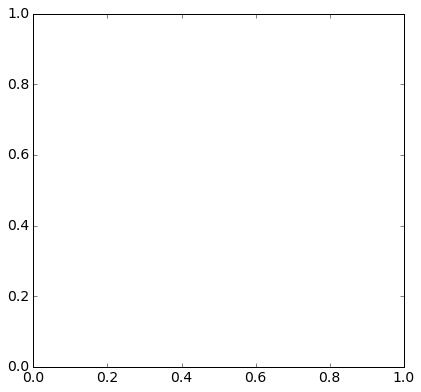

In [23]:
dict_population = {'parents':0, 'ancestral':1, 'evolved':2}
dict_background = {'WA':0, 'NA':1, 'WAxNA':2}
dict_gene = {'RNR2':0, 'RNR4':1, 'no driver':2, 'FPR1':3, 'TOR1':4}
dict_genotype = {'RNR2':0, 'RNR2*':2, 'RNR4':1, 'RNR4*':3,
                 'no driver':0, 'FPR1*':2, 'TOR1':1, 'TOR1*':3}
dict_panels = {
'WAxNA': {'HU':(0,0),'RM':(0,1)},
'WAxNA-WExSA': {'HU':(1,0),'RM':(1,1)}
}

# apply sorting ranks to reorder rows    
hybrids_norm_df.loc[:,u'rank_background_MATa'] = hybrids_norm_df[u'background_MATa'].map(dict_background)
hybrids_norm_df.loc[:,u'rank_background_MATα'] = hybrids_norm_df[u'background_MATα'].map(dict_background)
hybrids_norm_df.loc[:,u'rank_genotype_MATa'] = hybrids_norm_df[u'genotype_MATa'].map(dict_genotype)
hybrids_norm_df.loc[:,u'rank_genotype_MATα'] = hybrids_norm_df[u'genotype_MATα'].map(dict_genotype)
hybrids_norm_df.loc[:,u'rank_population_MATa'] = hybrids_norm_df[u'population_MATa'].map(dict_population)
hybrids_norm_df.loc[:,u'rank_population_MATα'] = hybrids_norm_df[u'population_MATα'].map(dict_population)
hybrids_norm_df.sort(columns=[u'rank_population_MATa',u'rank_population_MATα',
                              u'rank_background_MATa',u'rank_background_MATα',
                              u'rank_genotype_MATa',u'rank_genotype_MATα',
                              u'tetrad_MATa',u'tetrad_MATα',
                              u'spore_MATa',u'spore_MATα'],
                ascending=[True,True,True,True,True,True,True,True,True,True],inplace=True)

# environment attributes
environments = {u'HU': u'YNB+HU 10 mg/ml', 
                u'RM': u'YNB+RM 0.025 μg/ml', 
                u'YNB': u'YNB (control)'}

param='growth_rate'

fig = plt.figure(figsize=(13,13))

for (background,env_test) in [('WAxNA','HU'),('WAxNA','RM'),('WAxNA-WExSA','HU'),('WAxNA-WExSA','RM')]:
    ax = plt.subplot2grid((2, 2), dict_panels[background][env_test])
    
    # spores
    gs = spores_norm_df.groupby(['background','Environment']).get_group((background,env_test))
    S = gs.groupby([u'mating',u'spore'], sort=False).agg(np.mean)[param]

    # hybrids
    gh = hybrids_norm_df.groupby(['background','Environment']).get_group(((background,background),env_test))
    gh = gh.groupby([u'spore_MATa',
                     u'spore_MATα'],
                    sort=False).agg(np.mean)[param]
    H = gh.unstack(level=[u'spore_MATα'])

    # plot
    pheno.heatmap_spores(S, radius=0.5)
    pheno.heatmap_hybrids(H, fold=False, title=environments[env_test], pad=100)

# fig.subplots_adjust(left=0.2,bottom=0,right=0.8,top=1,hspace=0.01,wspace=0.01)
fig.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.95,hspace=0.05,wspace=0.60)
plt.show()